Προετοιμασία αρχείων δεδομένων για αναλυση και ορισμός βιβλιοθηκών που θα χρησιμοποιηθούν.

In [1]:
import os
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import glob
from datetime import datetime, timedelta
import numpy as np

#assuming we are in Q1 directory , we go to the parent folder
# Path to the folder containing the CSV files
folder_path = os.path.join('..', 'new_data')  # Assuming you want to work with the sampled data

# Get all the CSV files from the folder
csv_files = glob.glob(folder_path + '/*.csv')


In [2]:
# Columns to analyze
sensor_columns = ['back_x', 'back_y', 'back_z', 'thigh_x', 'thigh_y', 'thigh_z']

# Create a dictionary to store the grouped data for each action
action_labels = list(range(12))  # Action labels from 0 to 11
action_data_dict = {label: [] for label in action_labels} #dictionary initialization

# Create a dictionary to map action IDs to action names
action_id_to_name = {
    0: 'walking',
    1: 'running',
    2: 'shuffling',
    3: 'stairs (ascending)',
    4: 'stairs (descending)',
    5: 'standing',
    6: 'sitting',
    7: 'lying',
    8: 'cycling (sit)',
    9: 'cycling (stand)',
    10: 'cycling (sit, inactive)',
    11: 'cycling (stand, inactive)'
}

Στο παρακάτω κομμάτι κώδικα , αποθηκεύουμε όλα τα δεδομένα από όλα τα .csv αρχεία μας μέσα σε ένα Dataframe για να αποκτήσουμε μια πιο γενική ιδεά στην ανάλυση των δεδομένων μας. Πέρα από εκτυπώνεται και ένας πίνακας. Αυτός ο 22x12 πίνακας δείχνει αναλυτικά πόσες εγγραφές απο κάθε είδους κίνησης σε κάθε εγγραφο υπάρχει. Αυτό γίνεται με την χρήση του dictionary που ονομάσαμε label_counts_dict.

In [3]:
# List to store data from all files
all_data = []
# Dictionary to store label counts for each CSV file
label_counts_dict = {}

# Load each CSV file and group data by action (label)
for idx,csv_file in enumerate(csv_files):
    # Load the CSV file into a dataframe
    df = pd.read_csv(csv_file)
    
    # Append the DataFrame to the list
    all_data.append(df)

    filename = os.path.splitext(os.path.basename(csv_file))[0] #get filename 
    
    # Get the value counts of the 'label' column
    label_counts = df['label'].value_counts()
    label_counts_dict[filename] = label_counts.to_dict()
    
    # Group data by label and store in the dictionary
    grouped_data = df.groupby('label')
    for label, group in grouped_data:
        action_data_dict[label].append(group)

# Combine all data into a single DataFrame
combined_data = pd.concat(all_data)

# Convert the dictionary to a DataFrame
label_counts_df = pd.DataFrame(label_counts_dict).fillna(0).astype(int).T
# Sort the columns and rows
label_counts_df = label_counts_df.reindex(sorted(label_counts_df.columns), axis=1)
label_counts_df = label_counts_df.sort_index()

print(label_counts_df)

         0      1     2    3    4     5      6     7      8     9     10   11
S006   2484      0  1278  136  155  6266  25303  1303   2505   313  1128    0
S008   2146      0  2879   70   75  6528  29280     0    754    75    17   75
S009    567      0    18   45   56   609      0     0  12010  1091  1039   12
S010  17589      0  2967  597  340  9026   4646     0      0     0     0    0
S012   1294    221   719  431  279  2237  31172  1889      0     0     0    0
S013   3457    349  3732  346  285  5356  22342   755    276     0    10    0
S014   2811    249  1854  508  442  5631  23656   941    557     0     0    0
S015   5498    294  1206  704  661  6733  19505  6333    727   179     0    0
S016   3927    280  1705   31  240  5283  18978  3996   1049    28    25    0
S017   3598    514   936  813  608  3098  21788  4407    467   310   106   16
S018   6286   1380  1607  402  356  3869  14277  3286    604   146    15    0
S019   3102    475   876  460  345  1863  19124  2145   1371    

Δημιουργήσαμε και ένα bar chart, για να δουμε συνολικά (για όλα τα αρχεία) ποια είναι η κατανομή των δραστηριοτήτων 

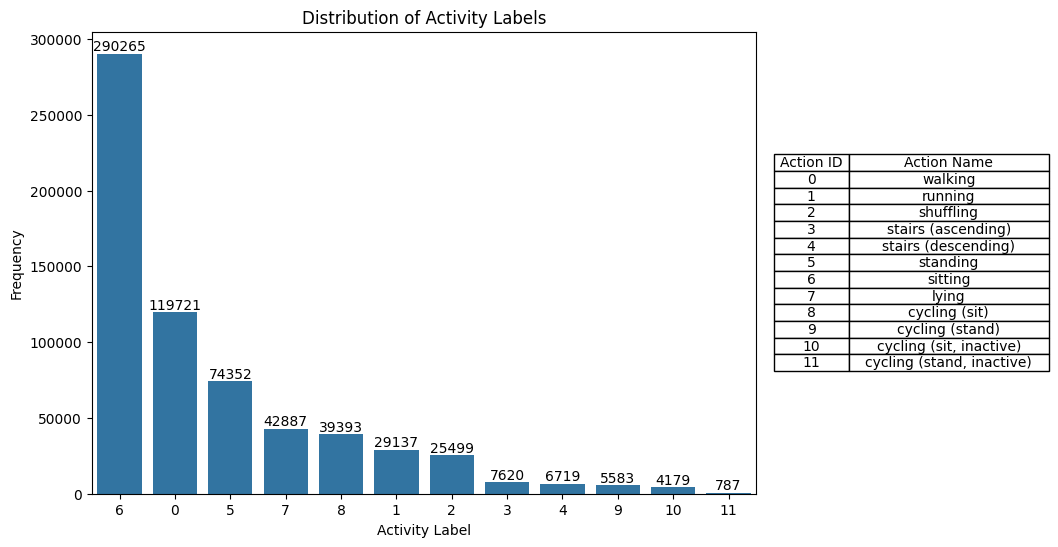

In [4]:
"""DISTRIBUTION OF ACTIVITY LABELS"""

# Convert the dictionary to a Pandas Series
action_series = pd.Series(action_id_to_name)
action_df = action_series.to_frame().reset_index()
action_df.columns = ['Action ID', 'Action Name']

# Calculate the frequency of each label
label_distribution = combined_data['label'].value_counts()

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw={'width_ratios': [3, 1]})
sns.barplot(ax=axes[0], x=label_distribution.index, y=label_distribution.values,  order=label_distribution.index) # Bar chart

# Add labels above the bars
for container in axes[0].containers:
    axes[0].bar_label(container)

axes[0].set_xlabel('Activity Label')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Activity Labels')

# Table
axes[1].axis('off')  # Turn off the axis
table = axes[1].table(cellText=action_df.values, colLabels=action_df.columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width([0, 1])

plt.subplots_adjust(wspace=0.1)  # Reduce the space between the plots

Με την εκτέλεση του παρακάτω cell βλέπουμε τις διαφορετικές γραφηκές παραστάσεις pdf των τιμών κάθε αισθητηρα κάθε συμμετέχοντα σε 12 διαφορετικές εικόνες για κάθε είδος δραστηριότητας. Αυτό το κομμάτι κώδικα παίρνει λιγη παραπάνω ωρα λόγο του μεγάλου όγκου δεδομένων.

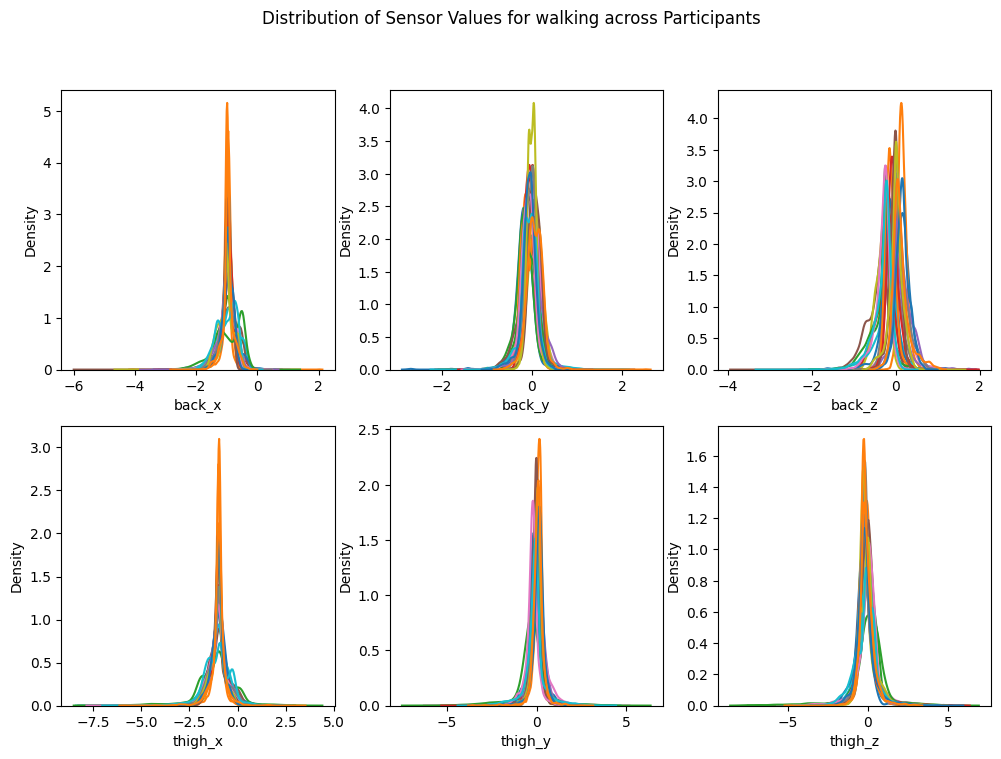

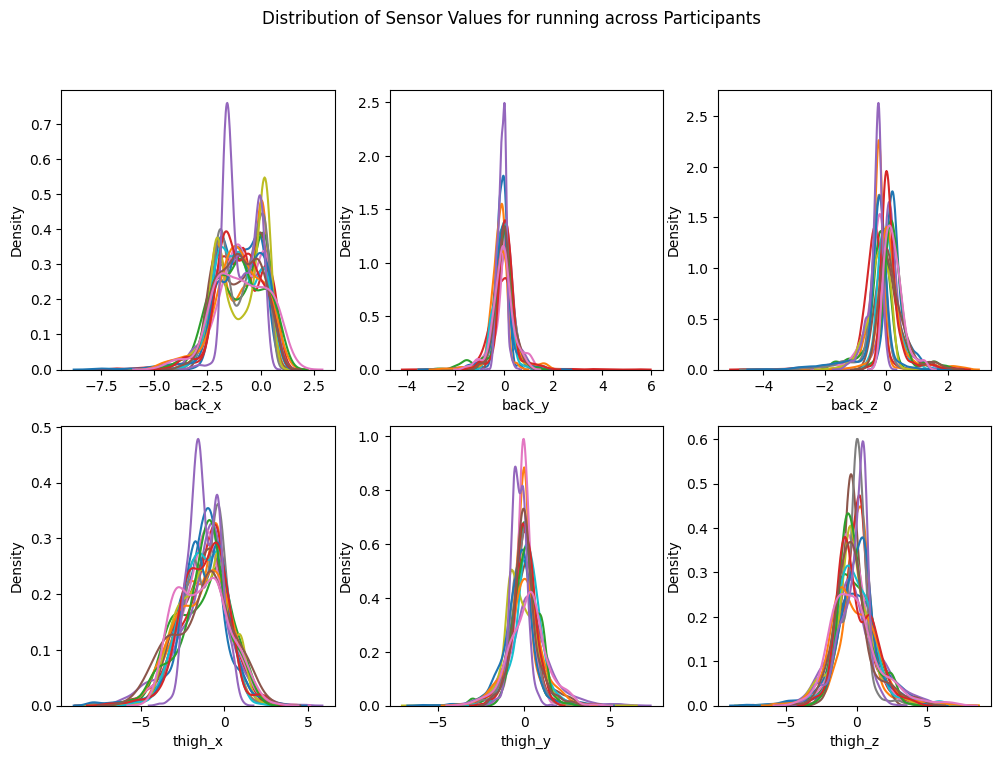

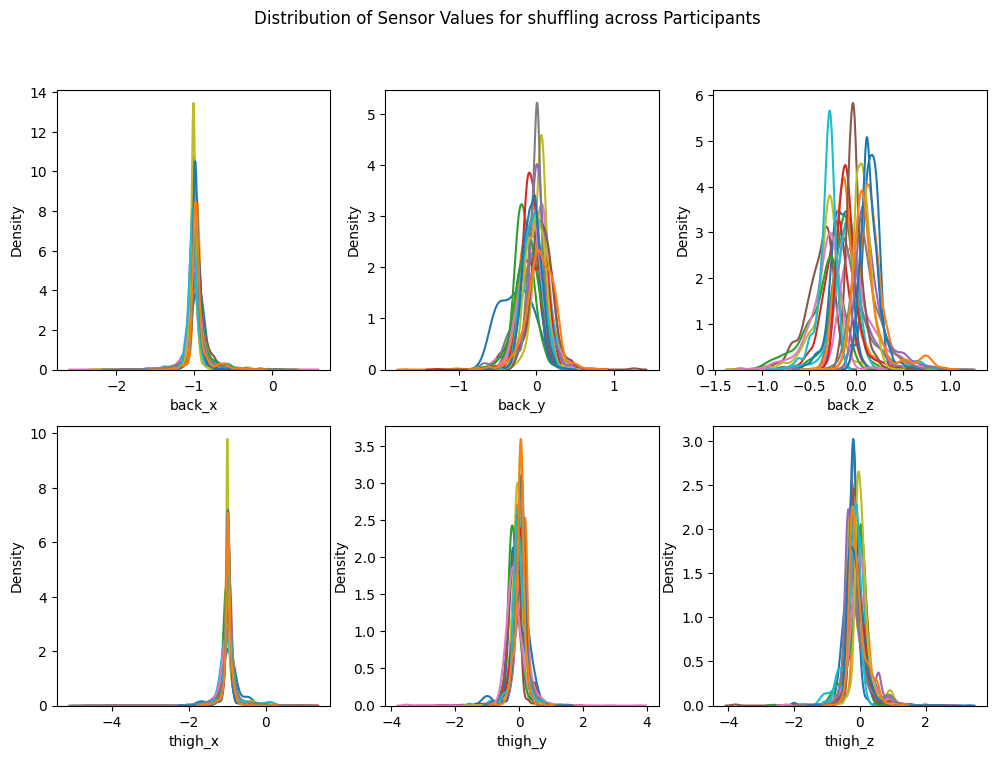

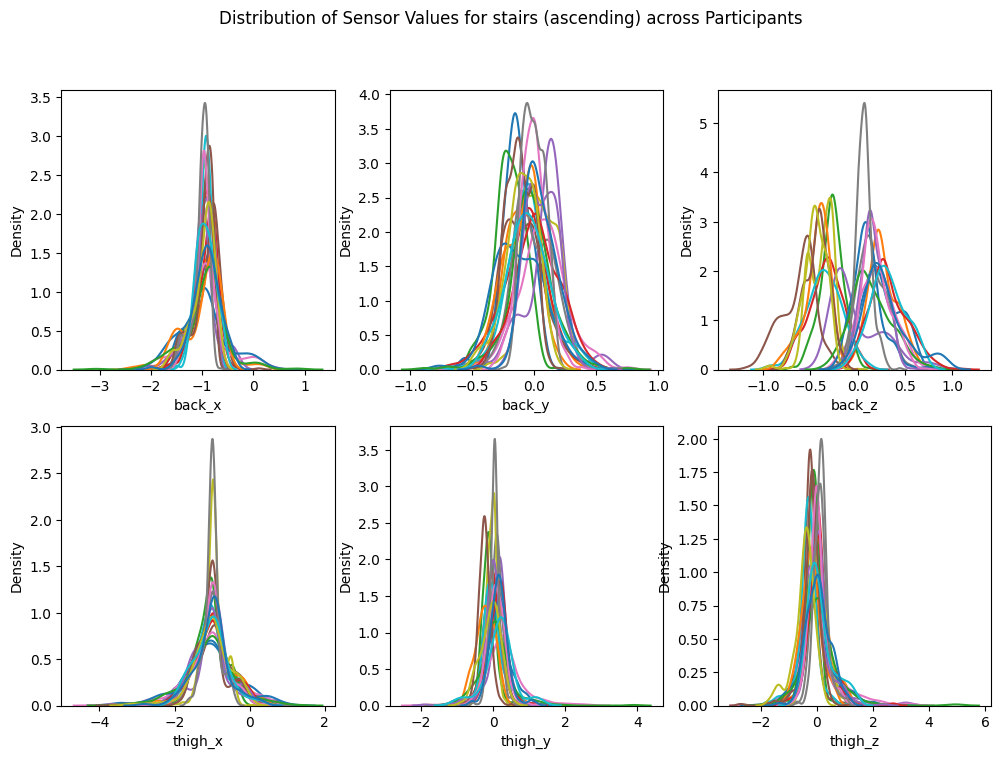

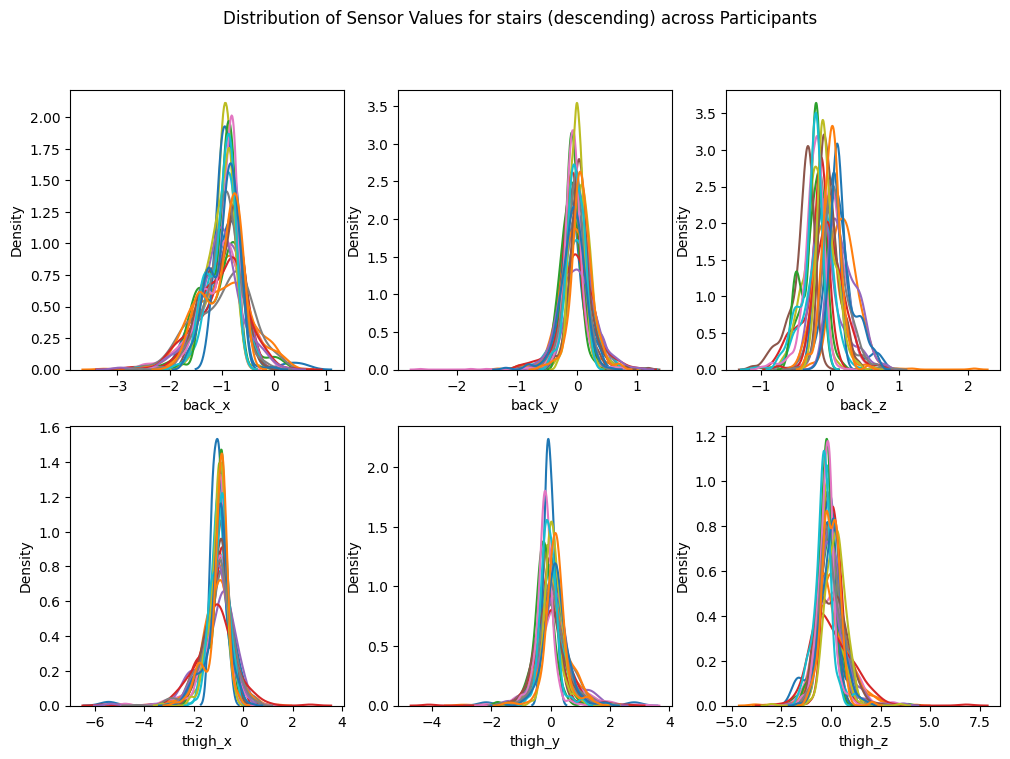

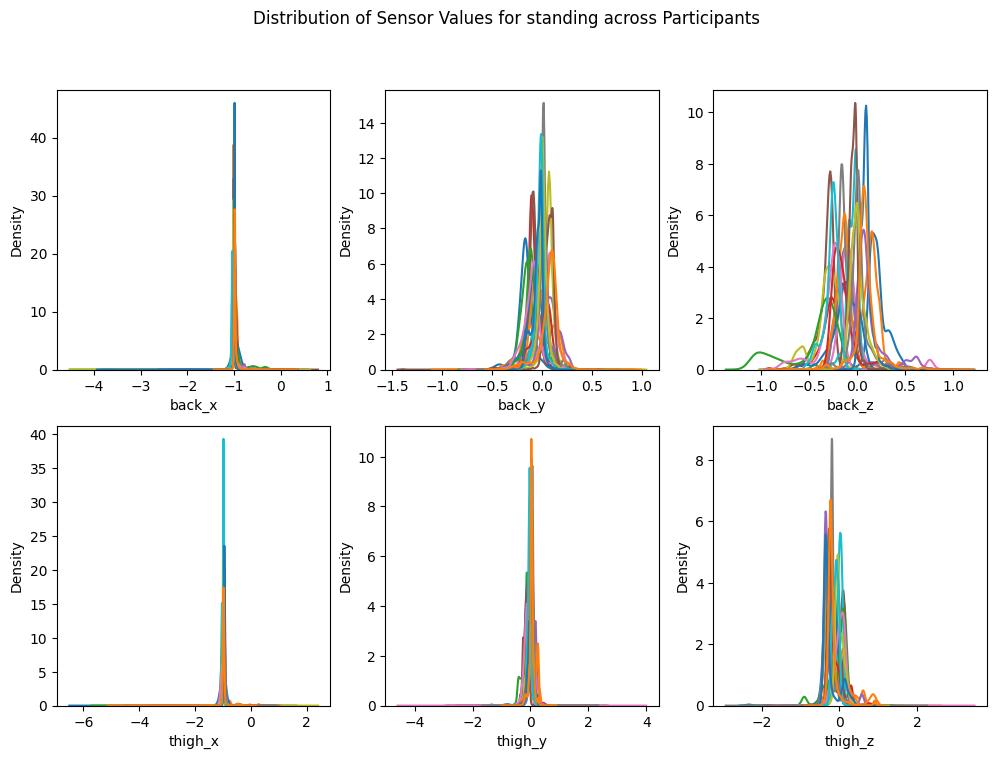

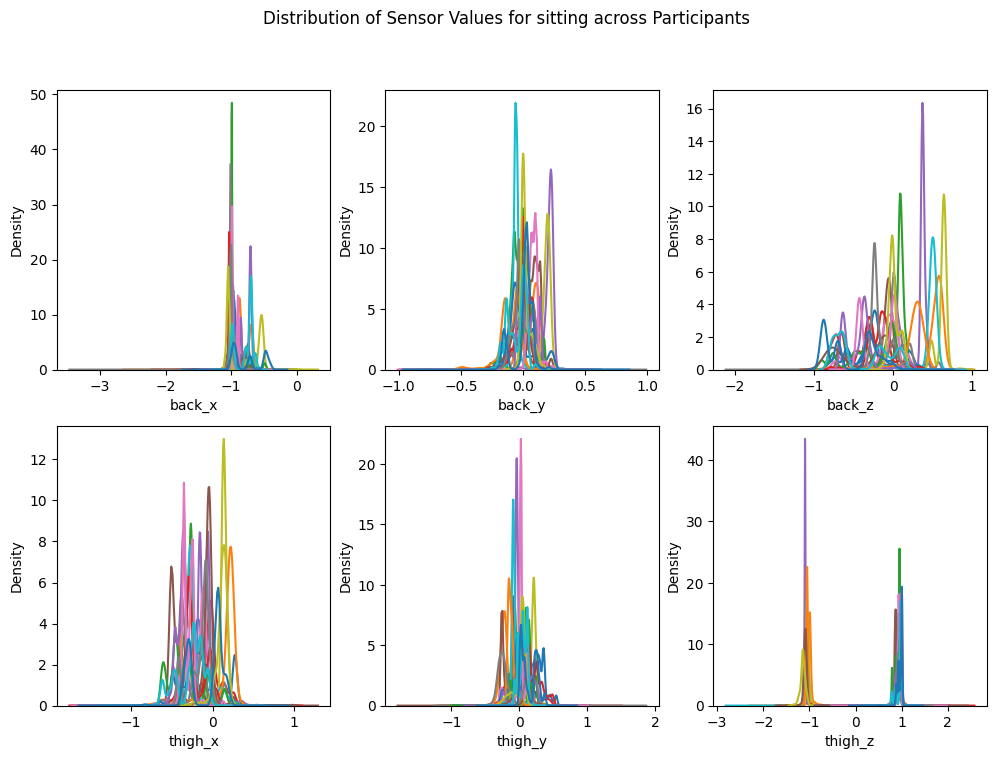

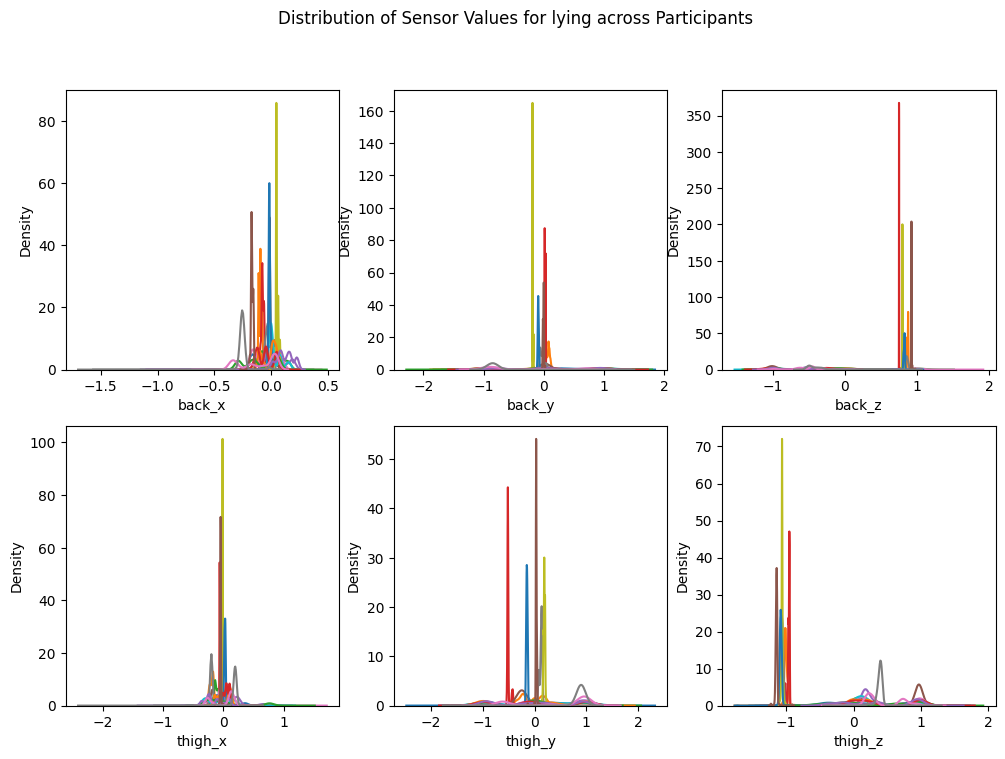

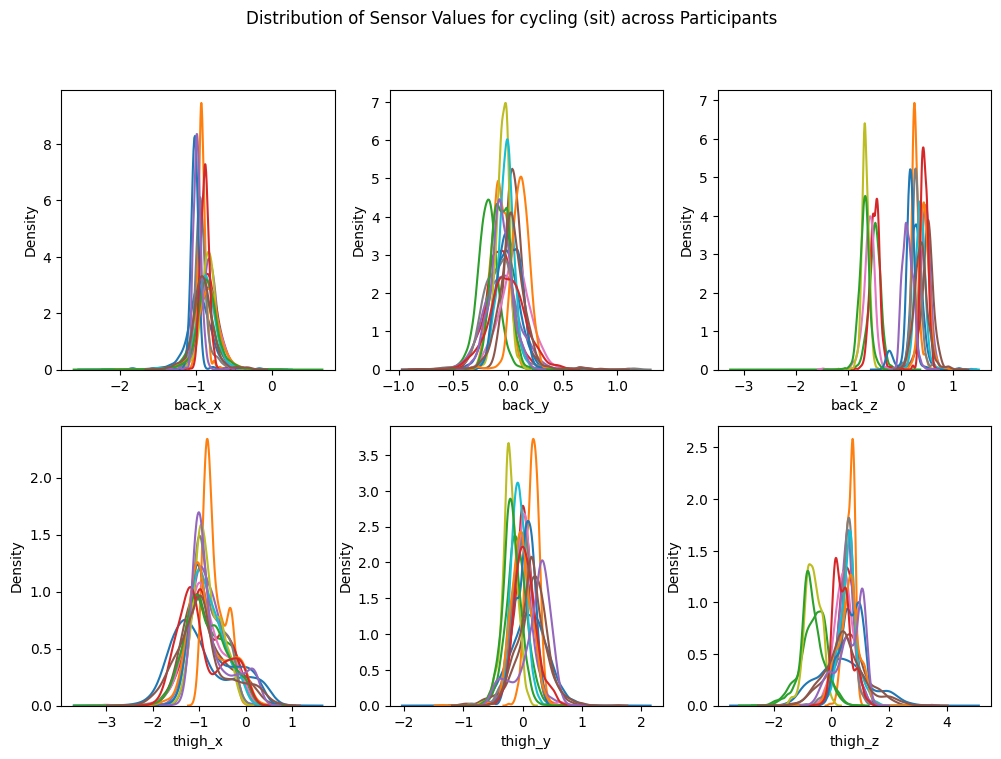

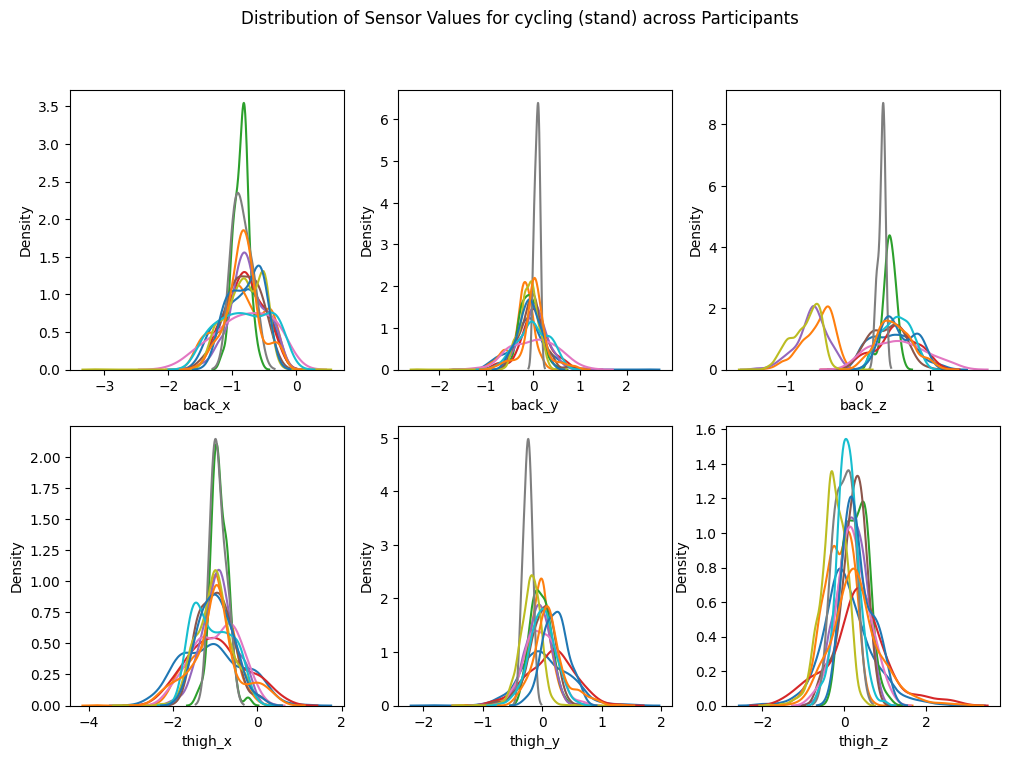

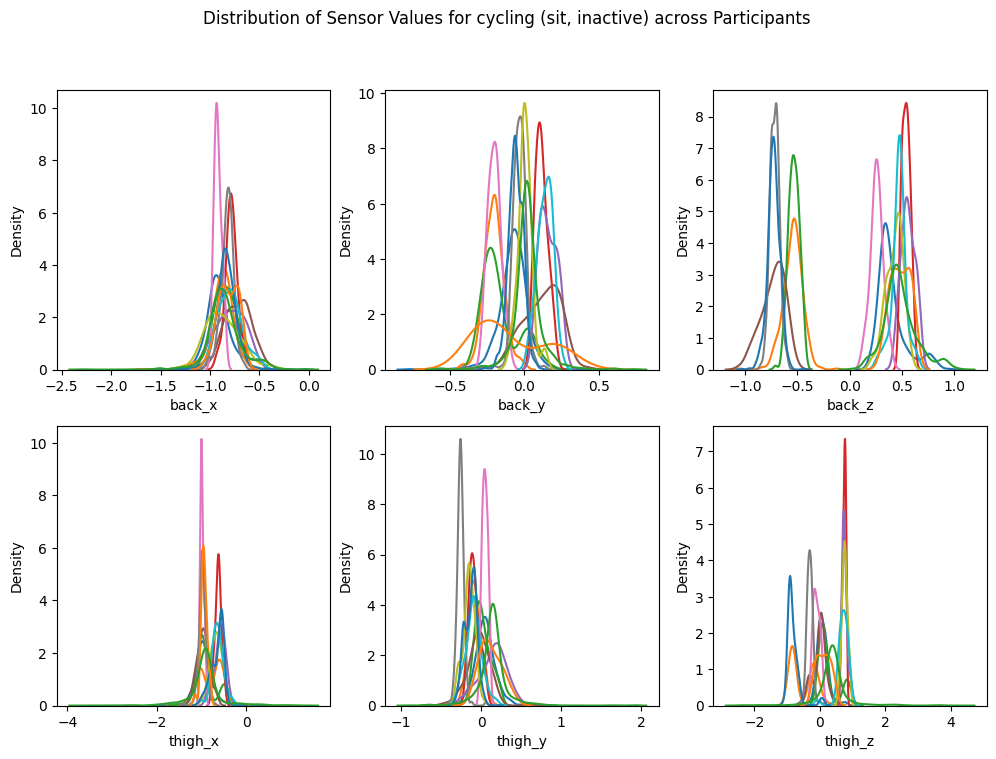

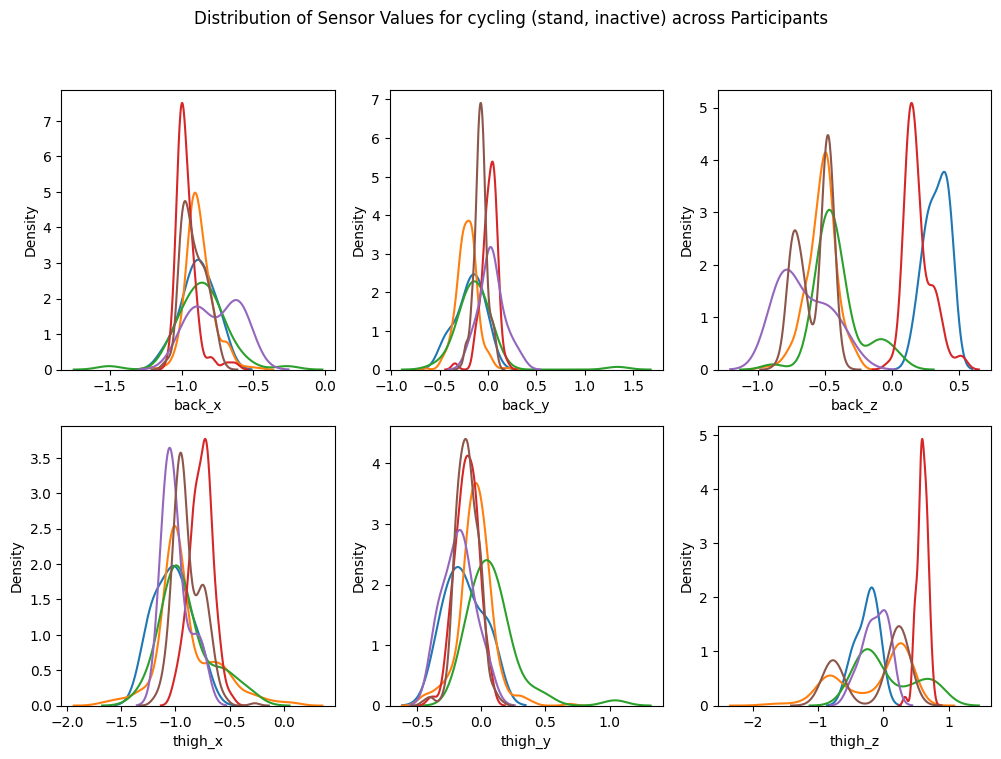

In [5]:
"""DISTRIBUTION OF SENSOR VALUES"""
# Plot histograms for each sensor value grouped by label across different participants
for label, groups in action_data_dict.items():
    plt.figure(figsize=(12, 8))
    plt.suptitle(f'Distribution of Sensor Values for {action_id_to_name[label]} across Participants')
    
    # Plot histograms for each sensor column
    for idx, sensor_col in enumerate(sensor_columns, 1):
        plt.subplot(2, 3, idx)
        
        # Plot data from different participants on the same graph
        # Loop through each action label
        for group in groups:
            # Plot PDF for sensor data of the current action label with KDE
            sns.kdeplot(group[sensor_col], fill=False)
    
    # Add a small pause to allow plots to display properly
    plt.pause(1.0)

In [6]:
#Create a column to identify where the action changes
combined_data['action_change'] = (combined_data['label'] != combined_data['label'].shift(1)).cumsum()
#Group by action and then by action_change
grouped = combined_data.groupby('label')
for label, group in grouped:
    print(f"Description of action data: {action_id_to_name[label]}")
    selected_columns=group.loc[:, ['timestamp', 'back_x', 'back_y','back_z','thigh_x', 'thigh_y','thigh_z']]
    summary_stats = selected_columns.describe().round(1)
    print(summary_stats)
    

Description of action data: walking
         back_x    back_y    back_z   thigh_x   thigh_y   thigh_z
count  119721.0  119721.0  119721.0  119721.0  119721.0  119721.0
mean       -1.0      -0.0      -0.1      -1.1      -0.0      -0.1
std         0.3       0.2       0.3       0.6       0.5       0.7
min        -5.8      -2.7      -3.8      -8.0      -7.1      -8.0
25%        -1.2      -0.1      -0.3      -1.3      -0.2      -0.4
50%        -1.0      -0.0      -0.1      -1.0       0.0      -0.1
75%        -0.8       0.1       0.0      -0.8       0.2       0.2
max         2.0       2.5       1.9       3.9       5.9       6.3
Description of action data: running
        back_x   back_y   back_z  thigh_x  thigh_y  thigh_z
count  29137.0  29137.0  29137.0  29137.0  29137.0  29137.0
mean      -1.0     -0.1     -0.3     -1.3     -0.2     -0.1
std        1.1      0.4      0.5      1.4      0.9      1.4
min       -8.0     -3.8     -4.7     -8.0     -6.7     -8.0
25%       -1.9     -0.3     -0.4  

Μετα την αναλυτική περιγραφή των δεδομένων μας , για καθε κίνηση και με γραφήματα αλλά και με πειγραφικές τιμές, ψάχνουμε να βρούμε αν υπάρχει συσχέτιση μεταξύ των τιμών των αισθητήρων. 

In [7]:
# Compute the correlation matrix
correlation_matrix = combined_data[['back_x', 'back_y', 'back_z', 'thigh_x', 'thigh_y', 'thigh_z']].corr()

# Print the correlation matrix
print(correlation_matrix)

           back_x    back_y    back_z   thigh_x   thigh_y   thigh_z
back_x   1.000000  0.014839 -0.106473  0.435929  0.049915 -0.043126
back_y   0.014839  1.000000  0.027304  0.006848 -0.183400  0.019082
back_z  -0.106473  0.027304  1.000000 -0.106174  0.027902 -0.167569
thigh_x  0.435929  0.006848 -0.106174  1.000000  0.160381  0.428518
thigh_y  0.049915 -0.183400  0.027902  0.160381  1.000000  0.149560
thigh_z -0.043126  0.019082 -0.167569  0.428518  0.149560  1.000000


Τέλος, κάνουμε μια ανάλυση των δεδομένων μας ως προς τον χρόνο.

Mean duration for action walking: 16.036038854805724 seconds
Mean duration for action running: 77.72693333333332 seconds
Mean duration for action shuffling: 2.1644573954983923 seconds
Mean duration for action stairs (ascending): 6.949198113207547 seconds
Mean duration for action stairs (descending): 4.890421455938697 seconds
Mean duration for action standing: 33550.18861974692 seconds
Mean duration for action sitting: 444.084152 seconds
Mean duration for action lying: 229.4926315789473 seconds
Mean duration for action cycling (sit): 51.70204081632654 seconds
Mean duration for action cycling (stand): 15.76764705882353 seconds
Mean duration for action cycling (sit, inactive): 8.827407407407406 seconds
Mean duration for action cycling (stand, inactive): 10.384000000000002 seconds


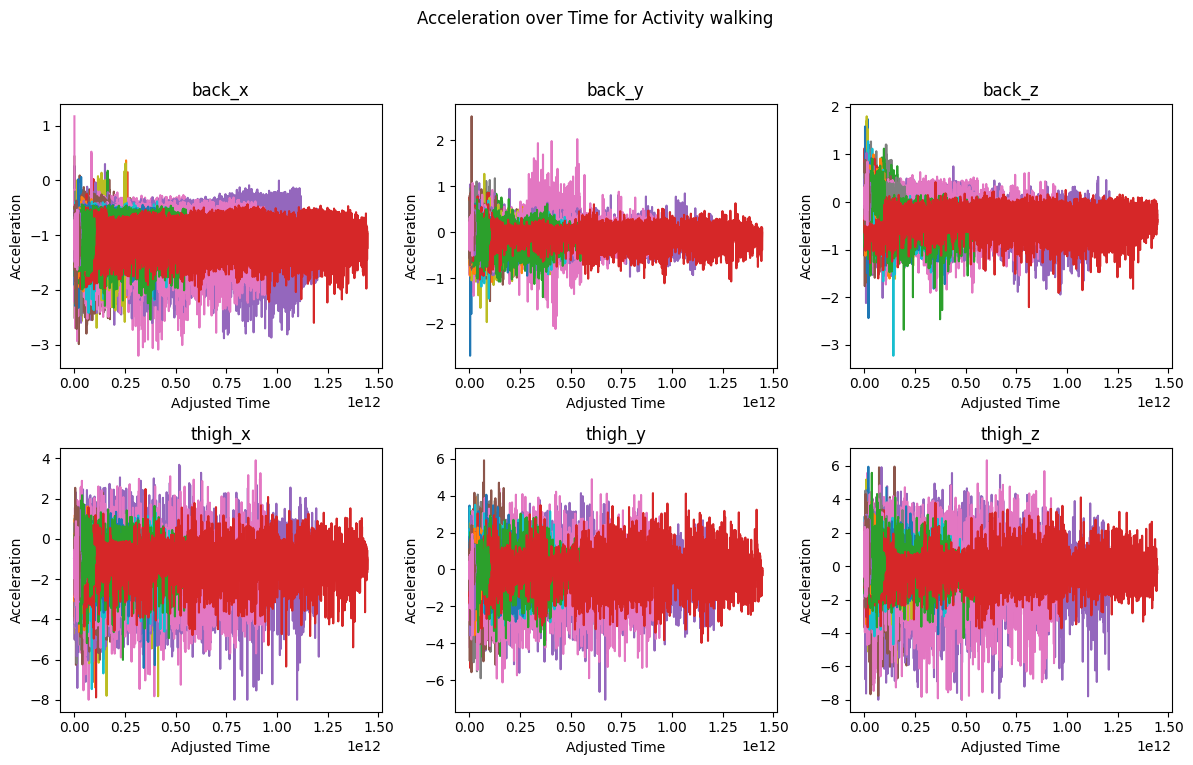

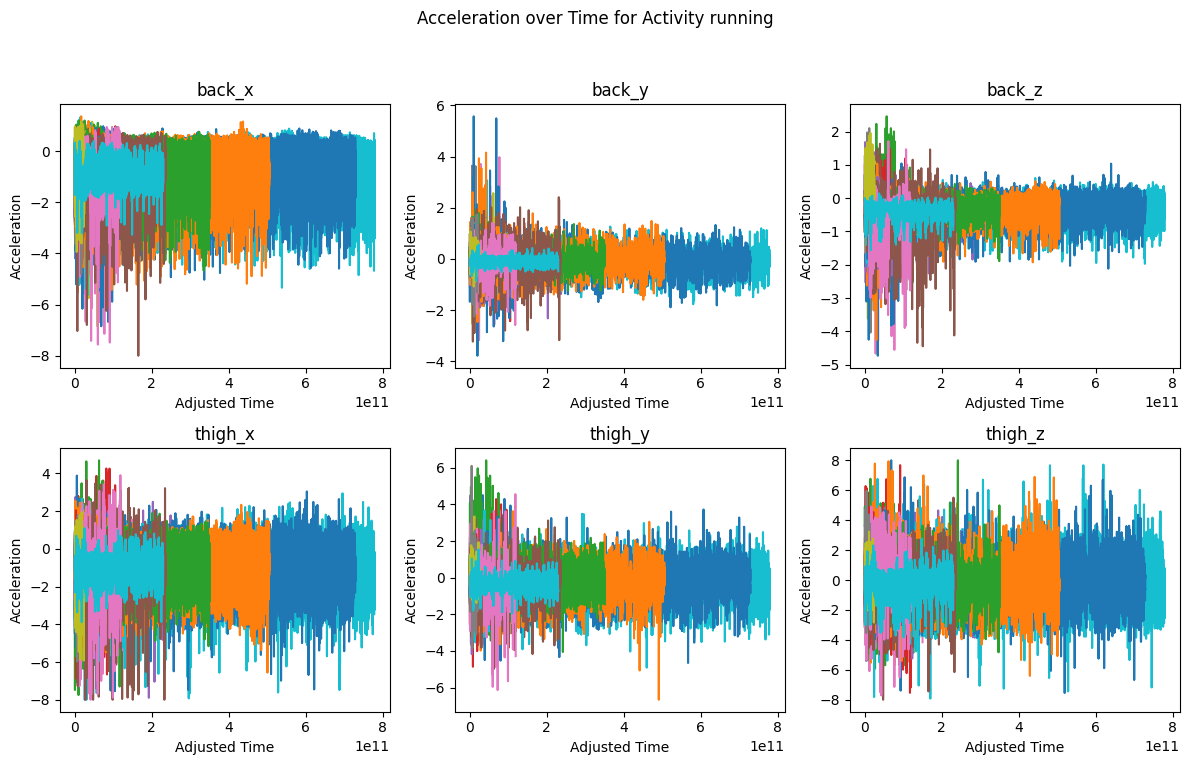

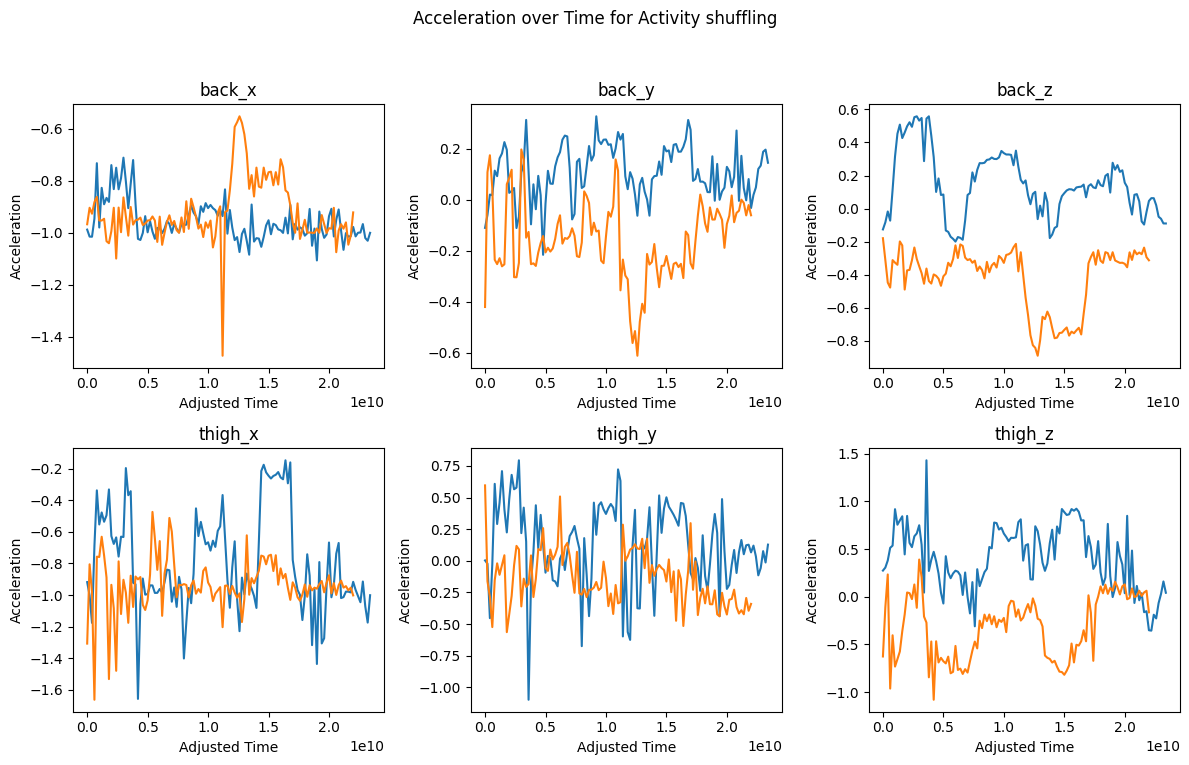

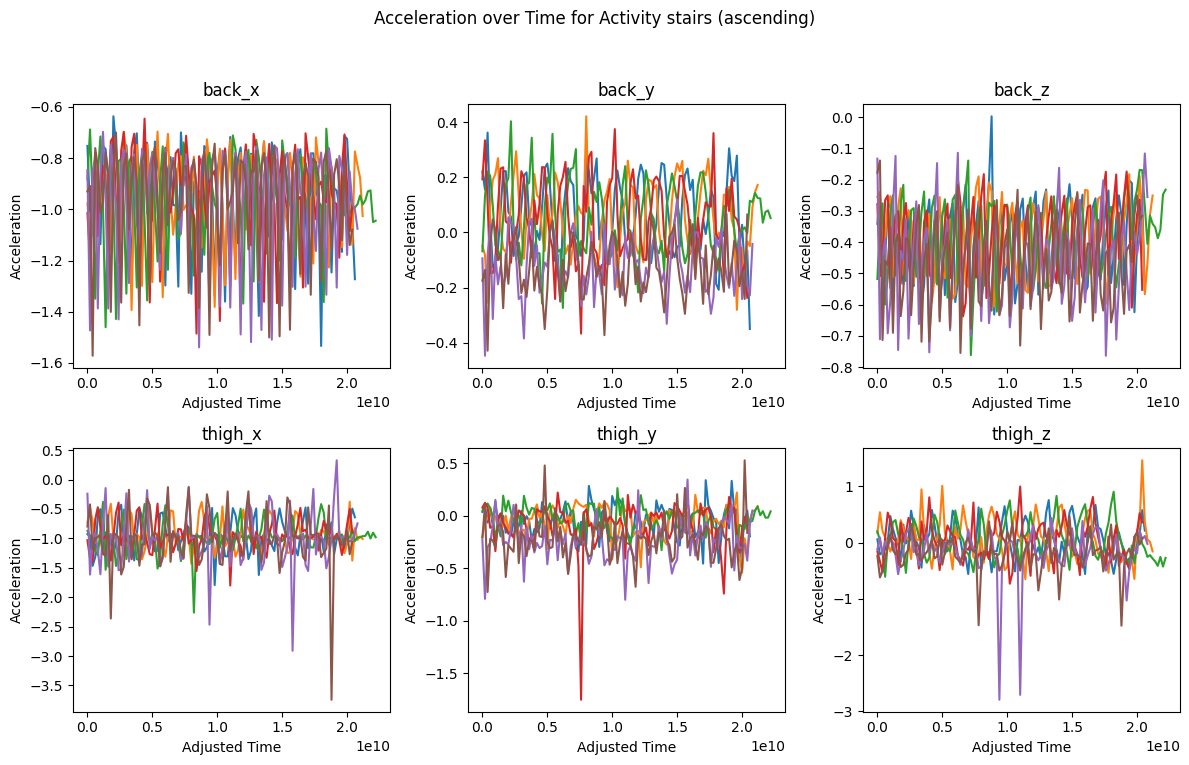

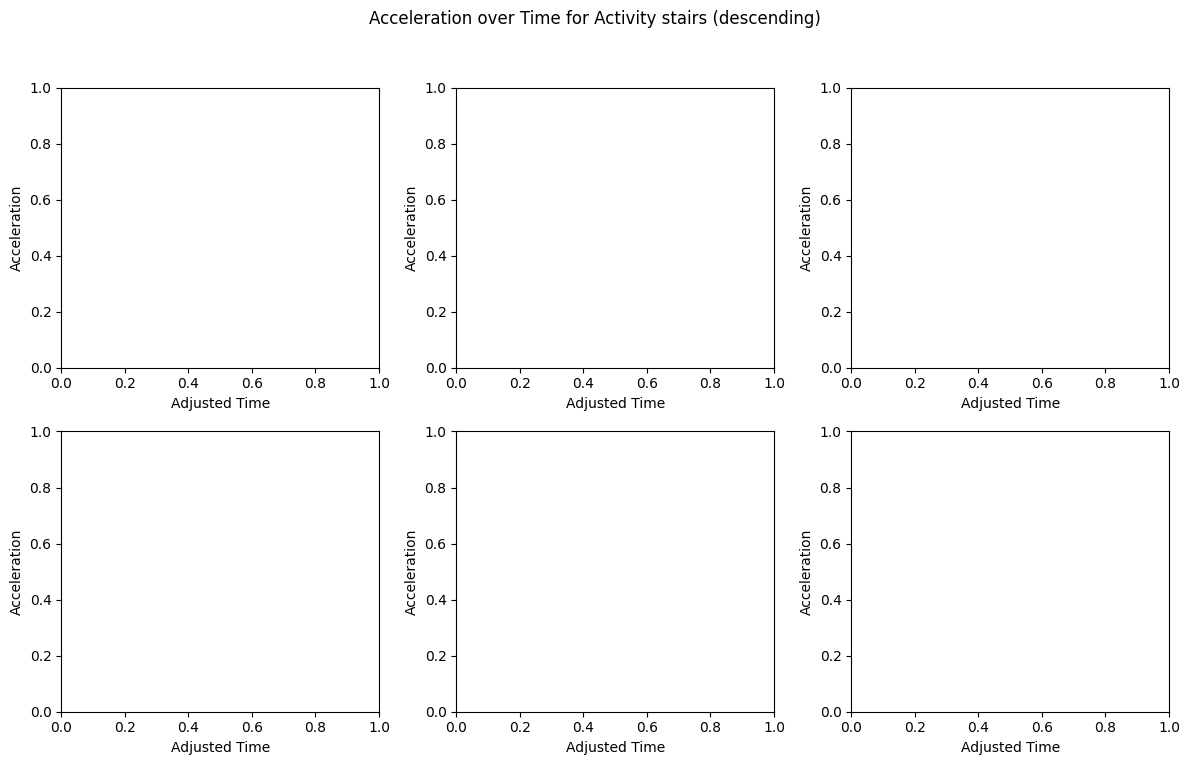

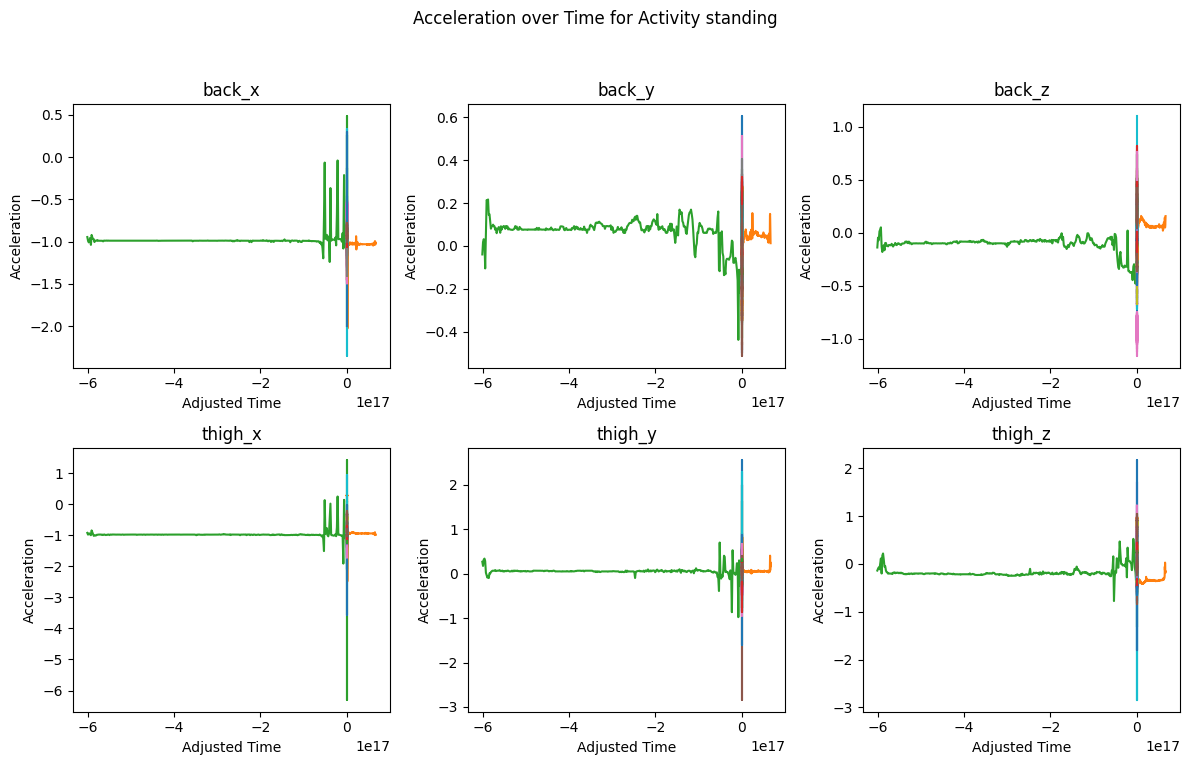

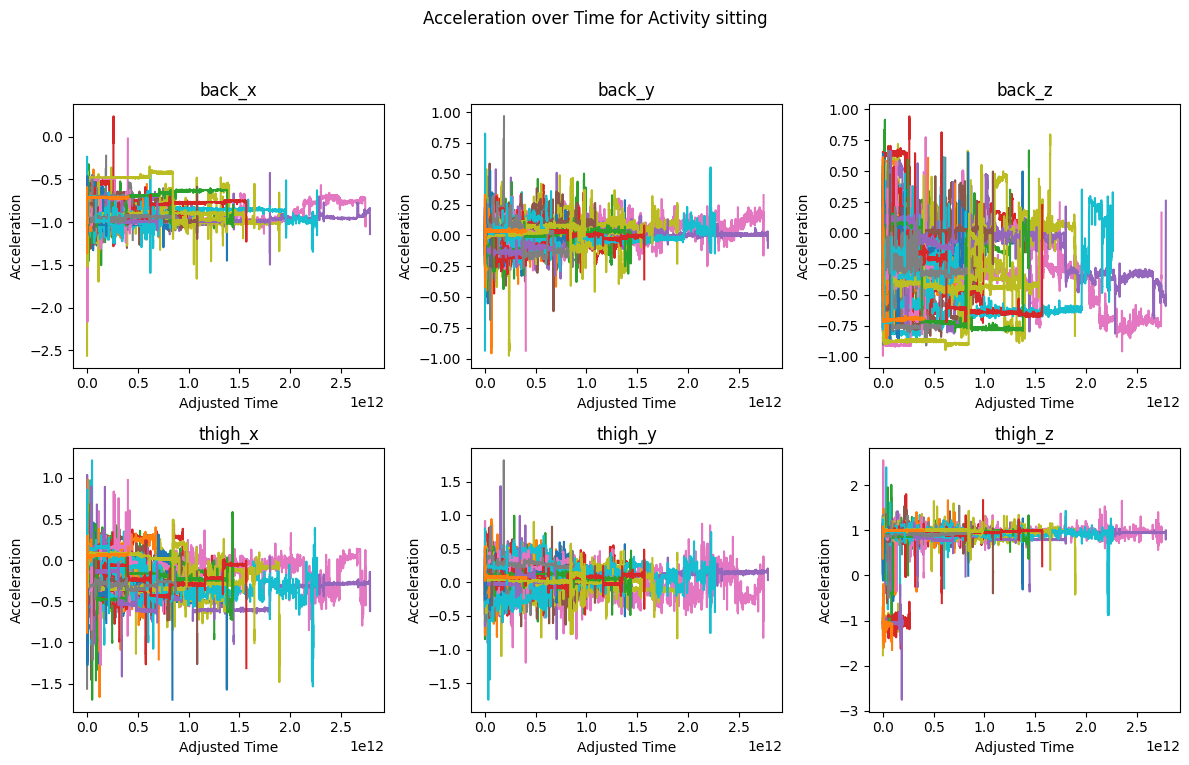

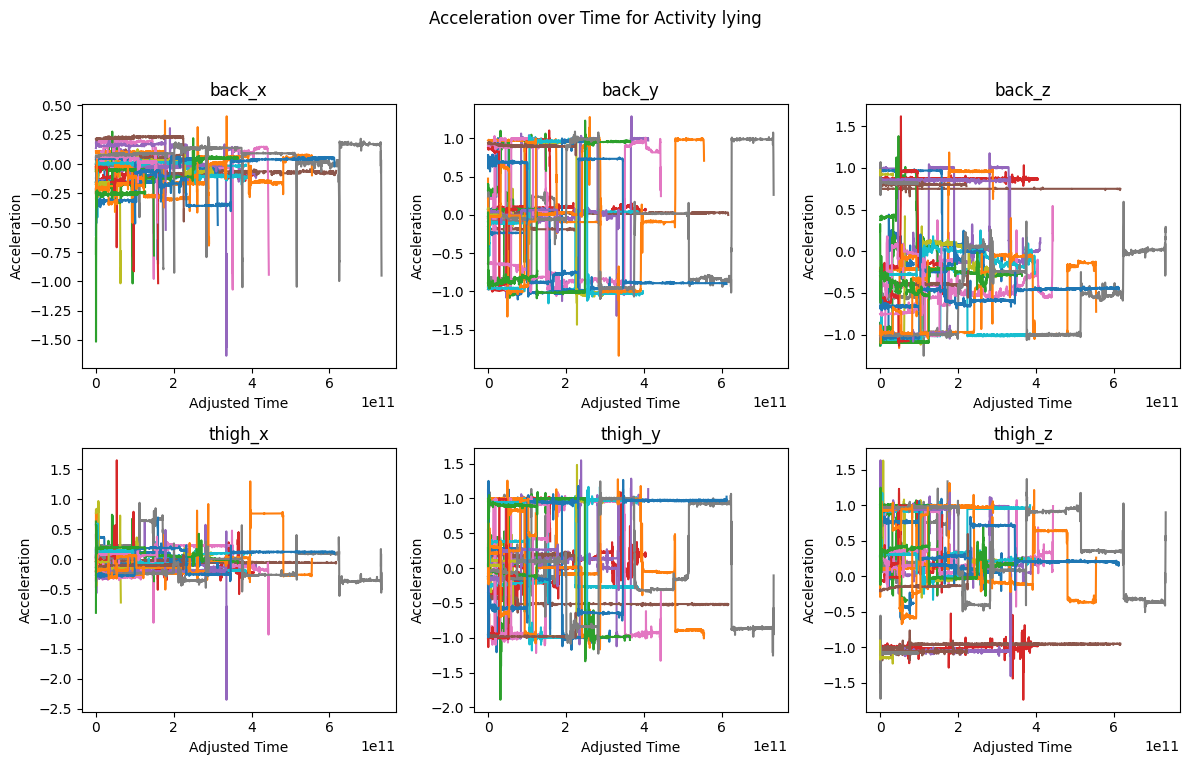

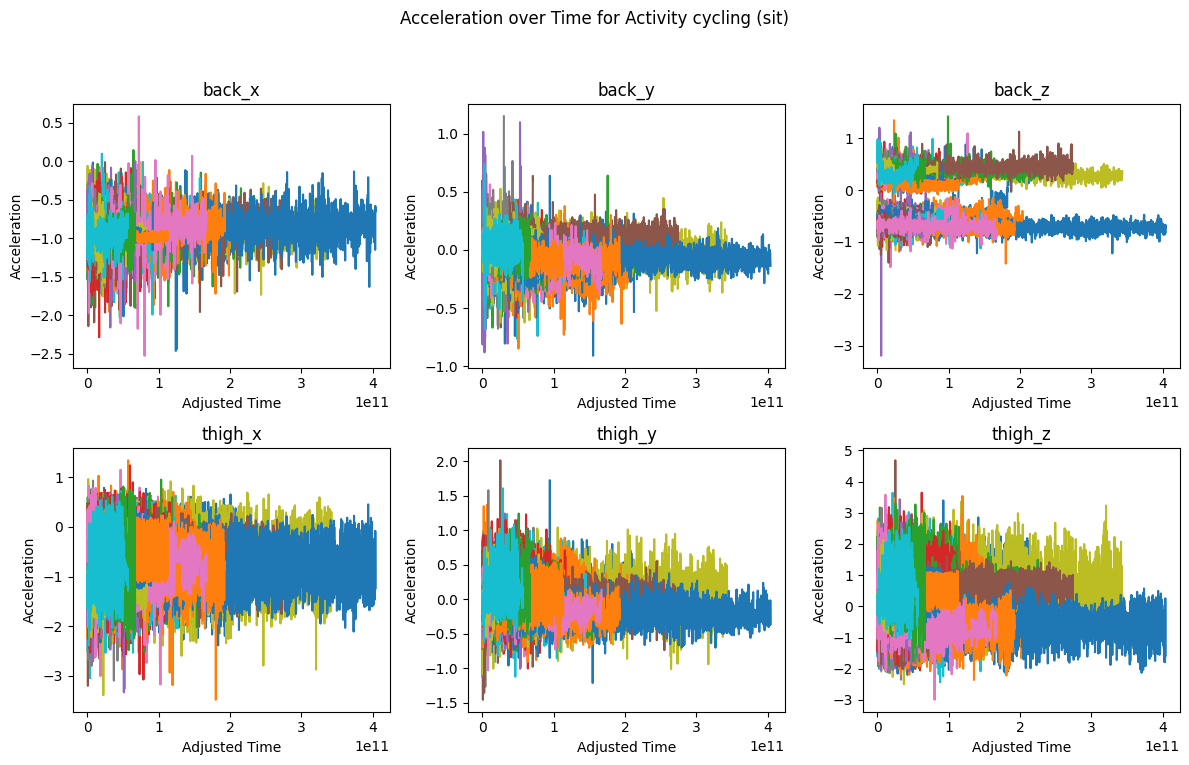

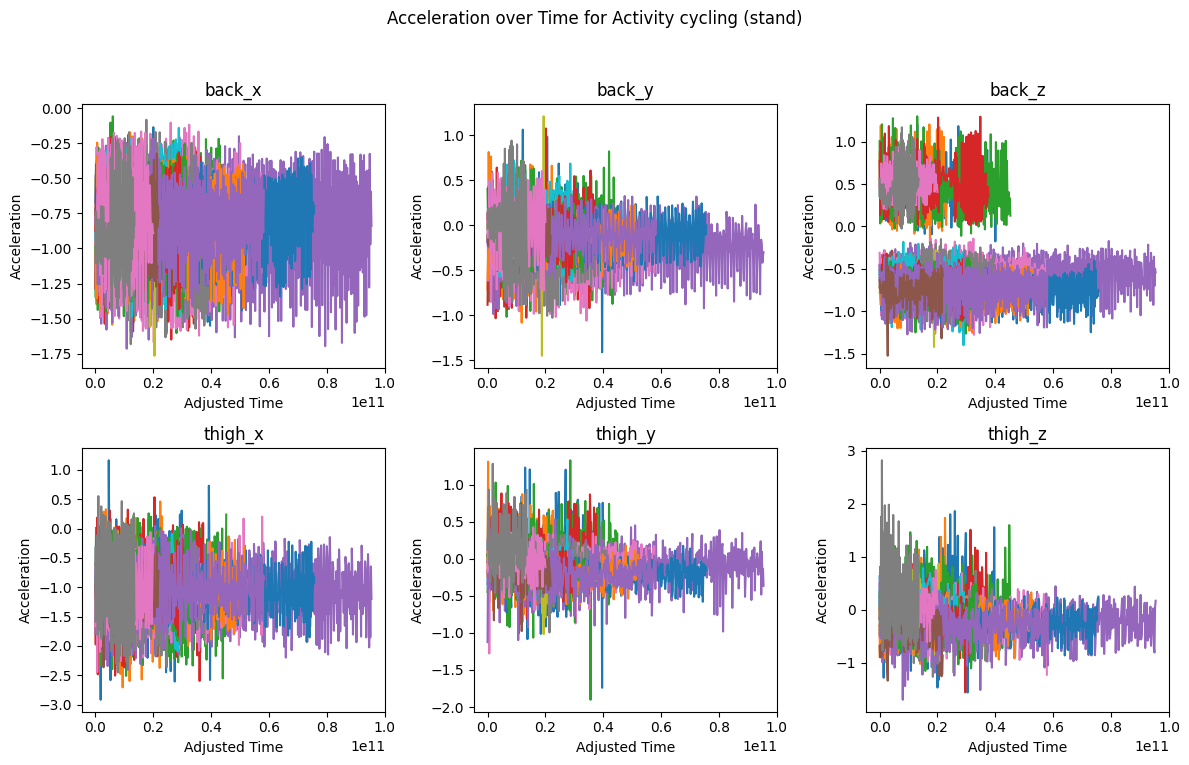

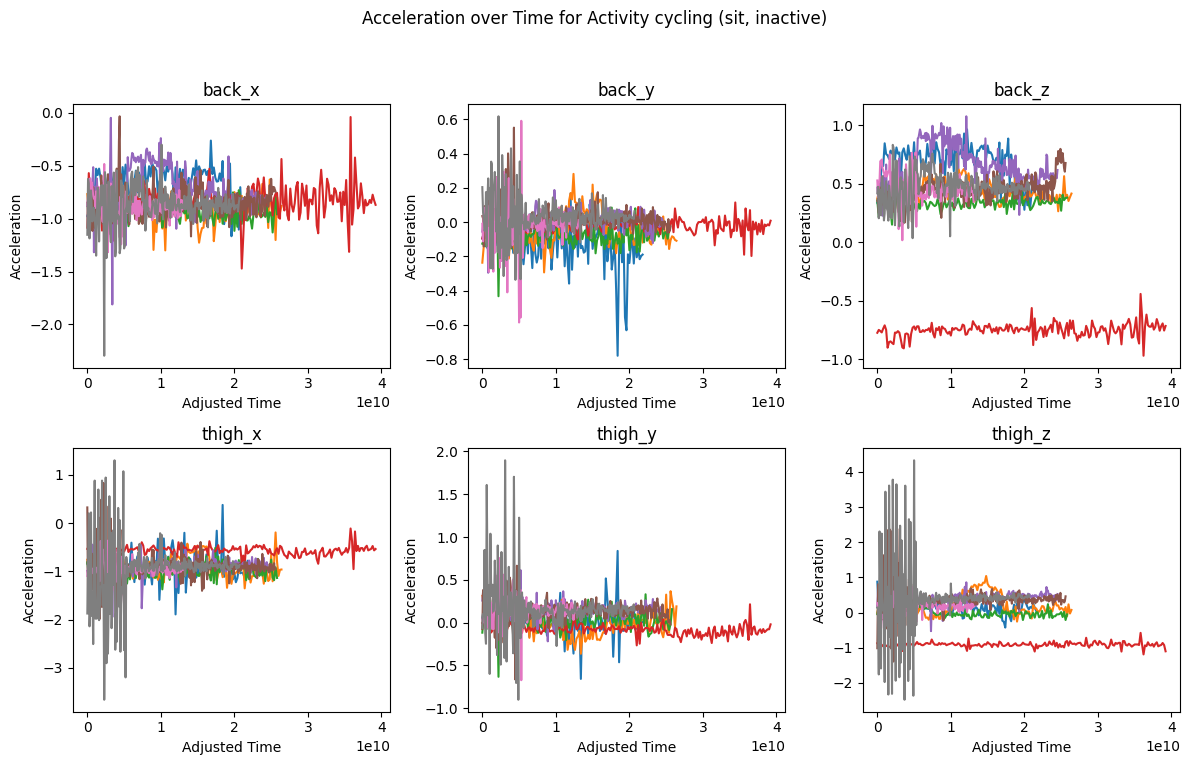

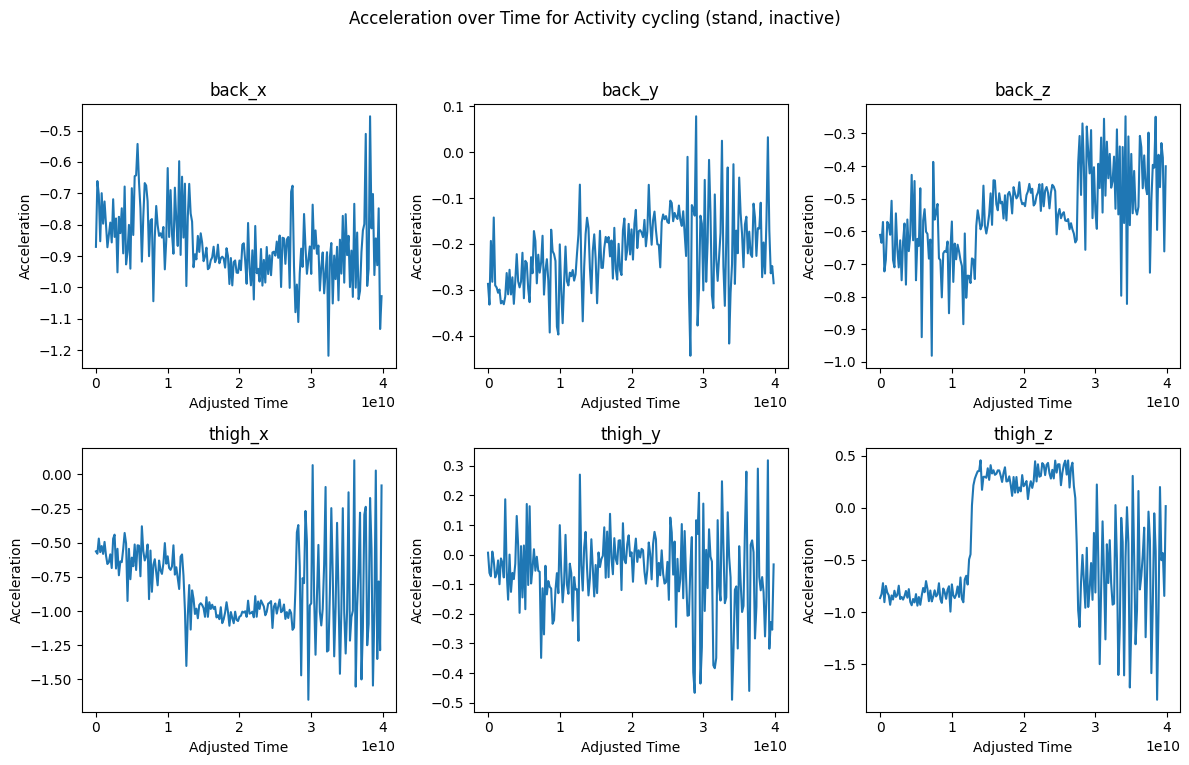

In [8]:
"""ACCELARATION OF ACTIONS IN TIME"""

# Iterate through each group (activity label)
for label, group in grouped:
    fig, axes = plt.subplots(2, 3, figsize=(12, 8))
    fig.suptitle(f'Acceleration over Time for Activity {action_id_to_name[label]}')
    # Flatten the axes array for easier indexing
    axes = axes.flatten()

    action_times= group.groupby('action_change')
    durations = []
    
    for key,action in action_times:
        beginning = datetime.strptime(action['timestamp'].iloc[0], '%Y-%m-%d %H:%M:%S.%f')
        ending = datetime.strptime(action['timestamp'].iloc[-1], '%Y-%m-%d %H:%M:%S.%f')

        duration = (ending - beginning).total_seconds()
        durations.append(duration)
        
        if len(action)>100:
            step=duration/(len(action)-1)
            
            # Generate the array from 0 to the duration with the calculated step size
            time = np.arange(0, duration + step/2, step)
            time = [timedelta(seconds=seconds) for seconds in time] # Convert to timedelta objects

            # Iterate through the sensor columns and plot each one in a different subplot
            for i, sensor_col in enumerate(sensor_columns):
                sns.lineplot(x=time, y=action[sensor_col], ax=axes[i])
                axes[i].set_title(sensor_col)

    mean_duration = np.mean(durations)
    print(f"Mean duration for action {action_id_to_name[label]}: {mean_duration} seconds")
    
    # Set common labels for the figure
    for ax in axes:
        ax.set_xlabel('Adjusted Time')
        ax.set_ylabel('Acceleration')

    # Adjust layout and show the plot
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

Στα παραπάνω γραφήματα , βλέπουμε μια είδους παρόμοια "συμπεριφορά" στις συναρτήσεις χρόνο για κάθε κίνηση ξεχωριστά. Πολλές όμως συναρτήσεις μοιάζουν απλά με λευκό θορυβο. Για τα γραφήματα της δραστηριότητας "stairs(descending)", βλέπουμε κενό γιατί δυστυχώς αυτή η κίνηση δεν είχε ποτέ διάρκεια πάνω από 10sec ή 20sec(επειδη σε κάποια εγγραφα έχουμε στιγμιότυπα κάθε 10ms και σε αλλα κάθε 20 ms). Καθως ειχαμε βαλει ένα κατω όριο για να αποφυγουμε τον σχεδιασμό κινησεων που κράτησαν πολύ λίγο.  